In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization,Input,Embedding,Dense,Dot, Reshape
from tensorflow.keras import Model

In [3]:
def custom_standardization(input_data):
    return stripped_tags

In [4]:
tag_data=pd.read_csv("../data/genome-tags.csv")

VOCAB_SIZE=tag_data.tagId.nunique()+2

VOCAB_SIZE

1130

In [5]:
tag_data

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s
...,...,...
1123,1124,writing
1124,1125,wuxia
1125,1126,wwii
1126,1127,zombie


In [6]:
VOCABULARY=tag_data.tag.unique().tolist()
len(VOCABULARY)

1128

In [7]:
SEQUENCE_LENGTH=50

In [8]:
master_data=pd.read_csv("../data/Master_dataset.csv")

In [9]:
NUMBER_OF_MOVIES=master_data.movieId.nunique()
NUMBER_OF_USERS=master_data.userId.nunique()

In [10]:
def create_model(embedding_size=16):
    user_tag=Input(name="user_tags",shape=[1],dtype=tf.string)
    movie_tag=Input(name="movie_tags",shape=[1],dtype=tf.string)

    user_tag_vectorized = TextVectorization(
    standardize="strip_punctuation",
    max_tokens=VOCAB_SIZE,
    output_mode='int',
    output_sequence_length=SEQUENCE_LENGTH,
    vocabulary=VOCABULARY)(user_tag)
    
    movie_tag_vectorized = TextVectorization(
    standardize="strip_punctuation",
    max_tokens=VOCAB_SIZE,
    output_mode='int',
    output_sequence_length=SEQUENCE_LENGTH,
    vocabulary=VOCABULARY)(movie_tag)
    
    user_embedding= Embedding(name = 'user_embedding',input_dim = NUMBER_OF_USERS, output_dim = embedding_size)(user_tag_vectorized)
    movie_embedding= Embedding(name = 'movie_embedding',input_dim = NUMBER_OF_MOVIES, output_dim = embedding_size)(movie_tag_vectorized)
    
    merged = Dot(name = 'dot_product', normalize = True, axes = 2)([user_embedding, movie_embedding])
    
    merged = Reshape(target_shape = [2500])(merged)
    
    out = Dense(1)(merged)
    
    model = Model(inputs = [user_tag, movie_tag], outputs = out)
    
    model.compile(optimizer = 'Adam', loss = 'mse', metrics = ['mse',"mae"])
    return model

In [11]:
model=create_model()

In [12]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 user_tags (InputLayer)         [(None, 1)]          0           []                               
                                                                                                  
 movie_tags (InputLayer)        [(None, 1)]          0           []                               
                                                                                                  
 text_vectorization (TextVector  (None, 50)          0           ['user_tags[0][0]']              
 ization)                                                                                         
                                                                                                  
 text_vectorization_1 (TextVect  (None, 50)          0           ['movie_tags[0][0]']         

In [13]:
def split_x_and_y(data,label="rating"):
    X_user=data["user_tags"]
    X_movie=data["tag"]
    y=data[label]
    return X_user,X_movie, y

In [14]:
train=pd.read_csv("../input/train_user_item.csv")
test=pd.read_csv("../input/test_user_item.csv")
validation=pd.read_csv("../input/validation_user_item.csv")

In [15]:
train_user, train_movie, train_y=split_x_and_y(train)
test_user, test_movie, test_y=split_x_and_y(test)

validation_user, validation_movie, validation_y=split_x_and_y(validation)

In [16]:
train

,user_tags,tag,rating
0,imdb top 250 dark humor stylish,1980s action action packed aviation awesome so...,5
1,imdb top 250 storytelling weird,bleak character study dark golden palm great a...,4
2,action good action chase,affectionate clever coen bros coen brothers co...,3
3,suspense fun movie horror,california catastrophe college comedy culture ...,3
4,original imdb top 250 great acting,action action packed arnold chase comedy espio...,4
...,...,...,...
59979,complex complicated complicated plot,art artist artistic biographical biography bio...,4
59980,imdb top 250 original action,adoption awful childhood children divorce fami...,3
59981,imdb top 250 great acting action,action action packed bad acting bad plot car c...,5
59982,comedy original funniest movies,chase classic conspiracy criterion espionage h...,4


In [17]:
history=model.fit(
    x=[train_user,train_movie],
    y=train_y,
    batch_size=128,
    validation_data=([validation_user,validation_movie],validation_y),
    epochs=10)

Epoch 1/10
469/469 [==============================] - 8s 12ms/step - loss: 1.3104 - mse: 1.3104 - mae: 0.9084 - val_loss: 1.0583 - val_mse: 1.0583 - val_mae: 0.8248
Epoch 2/10
469/469 [==============================] - 8s 17ms/step - loss: 1.0713 - mse: 1.0713 - mae: 0.8312 - val_loss: 1.0241 - val_mse: 1.0241 - val_mae: 0.8103
Epoch 3/10
469/469 [==============================] - 8s 17ms/step - loss: 1.0501 - mse: 1.0501 - mae: 0.8214 - val_loss: 1.0097 - val_mse: 1.0097 - val_mae: 0.8068
Epoch 4/10
469/469 [==============================] - 8s 17ms/step - loss: 1.0461 - mse: 1.0461 - mae: 0.8181 - val_loss: 0.9991 - val_mse: 0.9991 - val_mae: 0.7980
Epoch 5/10
469/469 [==============================] - 6s 13ms/step - loss: 1.0162 - mse: 1.0162 - mae: 0.8053 - val_loss: 1.0557 - val_mse: 1.0557 - val_mae: 0.8058
Epoch 6/10
469/469 [==============================] - 7s 15ms/step - loss: 1.0097 - mse: 1.0097 - mae: 0.8025 - val_loss: 0.9884 - val_mse: 0.9884 - val_mae: 0.8016
Epoch 7/10

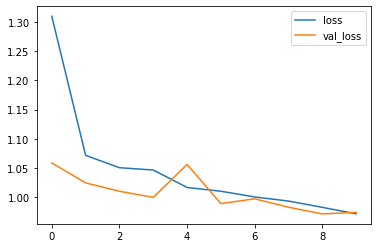

In [18]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(["loss","val_loss"])

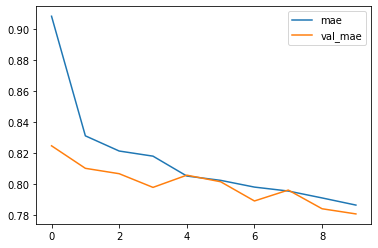

In [19]:
plt.plot(history.history["mae"])
plt.plot(history.history["val_mae"])
plt.legend(["mae","val_mae"])

In [20]:
model.evaluate(
    x=[test_user,test_movie],
    y=test_y,
    batch_size=128,
    )

361/361 [==============================] - 3s 8ms/step - loss: 0.9955 - mse: 0.9955 - mae: 0.7879


[0.9955309629440308, 0.9955309629440308, 0.7878592610359192]